In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [34]:
def plot_loss(log_path, ylim=None, MAX=-1,y_max=None):
    f = open(log_path, 'r')
    log_line = f.readlines()
    [print(log_line[i]) for i in range(23)]
    
    log_valid = [float(i.split(" ")[3].strip('\n')) for i in log_line if i.split(" ")[0] == "Valid"]
    log_train = [float(i.split(" ")[4].strip('\n')) for i in log_line if i.split(" ")[0] == "Train"]
    print("chance rate of loss : ", math.log(1/32000))
    print("initial validation loss : ", log_valid[0])
    #print(log_valid)
    log_val = log_valid[1:MAX+1]
    min_val = min(log_val)
    min_tra = min(log_train)
    [print("Minimize validation loss({}) : {} Epoch ".format(min_val, i+1)) 
           for i, l in enumerate(log_val) if l == min_val ]
    [print("Minimize training loss({}) : {} Epoch ".format(min_tra, i+1)) 
           for i, l in enumerate(log_train) if l == min_tra ]
    log_train = log_train[:MAX]
    x = np.arange(len(log_val))
    y1 = np.array(log_train)
    y2 = np.array(log_val)
    plt.figure()
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.legend()
    if ylim:
        plt.ylim(ylim[0],ylim[1])
    plt.grid()
    plt.show

# ☆ twitter -> all using kao

In [68]:
log_path_tw21_allkao =  "../../emotion_dialogue_model/log/train20190308024021.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/kao/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0307_tw21_allkao

Use emotion: True

Checkpoint path: ./model/0212_twitter_21.mdl

Pretrained: True

Fix embedding: False

learning_rate: 3e-05

hidden_size: 256

lr_decay: 0.5773502691896258

batch_size: 64

dropout: 0.1

max_epoch: 400

SOS_id: 1

decay_step: 12500

max_gradient: 50.0

l2_pooling: False

EOS_id: 2

num_layers: 2

UNK_id: 3

tfd_lambda: 0.4

decoder_learning_ratio: 1.0

inf_last: False

chance rate of loss :  -10.373491181781864
initial validation loss :  8.0256
Minimize validation loss(4.2981) : 24 Epoch 
Minimize training loss(3.0185) : 44 Epoch 


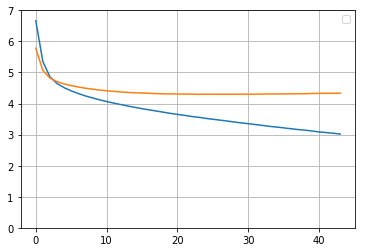

In [78]:
plot_loss(log_path_tw21_allkao, ylim=[0,7],MAX=60)

In [76]:
CUDA_VISIBLE_DEVICES=0
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0307_tw21_allkao_24.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning\
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion \
                    --num_inf 5

Loading the test dataset...
Read 205 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: どんな?
tgt: 整理整頓はとても大切です。
tgt_emotion: NONE

 inf:  NONE
1[-0.90]: Aさんのために掃除しようよ!(喜) 
2[-0.94]: Aさんのために掃除しようよ。(悲) 
3[-1.00]: Aさんのために掃除しようよ!(怒) 
4[-1.45]: Aさんのために掃除しようよ(・_・) 
5[-1.48]: Aさんのために掃除しようよ(悲) 
tgt_emotion: NONE

 inf:  neutral
1[-0.98]: Aさんが掃除しようよ。(・_・) 
2[-1.00]: Aさんが病気になるよ。(・_・) 
3[-1.02]: Aさんが掃除しようよ!(・_・) 
4[-1.06]: Aさんが病気になるよ?(・_・) 
5[-1.48]: Aさんが掃除しようよ(・_・) 
tgt_emotion: NONE

 inf:  anger
1[-0.69]: Aさんのために掃除しようよ!(怒) 
2[-0.78]: Aさんの健康が心配だよ!(怒) 
3[-0.78]: Aさんの健康を考えてごらん!(怒) 
4[-0.79]: Aさんの健康が心配なのです?(怒) 
5[-1.19]: Aさんのため!(怒) 
tgt_emotion: NONE

 inf:  sad
1[-0.78]: Aさんが健康を考えています。(悲) 
2[-0.80]: Aさんの健康が心配なんだよ?(悲) 
3[-0.88]: Aさんのために掃除しようよ!(喜) 
4[-1.21]: Aさんの健康が心配だよ(悲) 
5[-1.23]: Aさんが健康を考えています(悲) 
tgt_emotion: NONE

 inf:  happy
1[-0.73]: Aさんのために掃除しようよ!(喜) 
2[-0.87]: Aさんが健康を考えています。(喜) 
3[-0.90]: Aさんの健康が心配なんだよ?(悲) 
4[-1.01]: Aさんが健康を考えています。(悲) 
5[-1.30]: Aさんが健康を考えています(悲) 
tgt_emo


 inf:  contentment
1[-0.76]: AさんはAさんのことが大好きなんだ?(悲) 
2[-0.84]: AさんはAさんのことが大好きなんだ!(喜) 
3[-1.31]: Aさんはまだ若いんだよ?(悲) 
4[-1.32]: Aさんはまだ若いんだよ!(喜) 
5[-1.36]: Aさんはまだ若いんだよ。(悲) 
Dial 9:
src: この方がすぐ着たい時に着れるから便利なんだよ。
tgt: 引き出しも開けっ放しで、歩くたびにAさん自身がぶつかってるじゃないですか。
tgt_emotion: NONE

 inf:  NONE
1[-1.90]: そりゃそうですよ!(喜) 
2[-1.93]: そりゃそうですよ?(・_・) 
3[-2.06]: そりゃそうですよ?(悲) 
4[-2.06]: そりゃそうです!(喜) 
5[-2.13]: そりゃそうですよ!(悲) 
tgt_emotion: NONE

 inf:  neutral
1[-0.27]: ジョギングしても埃が汚れますよ。(・_・) 
2[-0.48]: ジョギングしても埃が汚れますよ(・_・) 
3[-1.45]: そりゃそうですよ!?(・_・) 
4[-1.57]: そりゃそうですよ?(・_・) 
5[-1.58]: そりゃそうですよ!(・_・) 
tgt_emotion: NONE

 inf:  anger
1[-1.41]: そりゃそうですよ!!(怒) 
2[-1.44]: そりゃそうですよ!(怒) 
3[-1.45]: そりゃそうですよ!?(怒) 
4[-1.47]: そりゃそうですよ?!(怒) 
5[-1.57]: そりゃそうです!(怒) 
tgt_emotion: NONE

 inf:  sad
1[-1.76]: そりゃそうですよ?(悲) 
2[-1.85]: そりゃそうですよ!(喜) 
3[-1.92]: そりゃそうですよ!(悲) 
4[-1.97]: そりゃそうです!(悲) 
5[-2.00]: そりゃそうです!(喜) 
tgt_emotion: NONE

 inf:  happy
1[-1.58]: そりゃそうですよ!(喜) 
2[-1.67]: そりゃそうです!(喜) 
3[-1.87]: そりゃそうでしょ!(喜) 
4[-1.92]: そりゃそうでしょ


 inf:  NONE
1[-0.98]: Aさんが掃除しようよ!(怒) 
2[-1.11]: 早く掃除しようよ!(怒) 
3[-1.20]: 早く掃除してください!(喜) 
4[-1.20]: 早く掃除しようよ!(喜) 
5[-1.28]: 早く掃除してください!(怒) 
Dial 46:
src: うるさいな。それなら君が片付ければいいだろう。満足いくようにしたら良いじゃないか。
tgt: 私は生活指導のためのロボットです。生活の世話をするためのロボットではありません。
tgt_emotion: anger

 inf:  NONE
1[-0.68]: Aさんの言うことを聞いてくれて下さい。(悲) 
2[-0.83]: Aさんの為に掃除しようよ!(喜) 
3[-0.91]: Aさんの為に掃除してください!(喜) 
4[-0.99]: Aさんの為に掃除してください。(悲) 
5[-1.00]: Aさんの為に掃除しようよ。(悲) 
Dial 47:
src: そうだけどさー。
tgt: そんな事では私は必要ないのですね。とっととお払い箱にして下さい。
tgt_emotion: sad

 inf:  NONE
1[-0.77]: Aさんのために掃除しようよ!(喜) 
2[-0.79]: Aさんの為に掃除しようよ!(喜) 
3[-0.91]: Aさんの為に掃除してください!(喜) 
4[-0.95]: Aさんのために掃除しようよ!(怒) 
5[-0.96]: Aさんの為に掃除してください。(・_・) 
Dial 48:
src: これからもいろいろ教えてくれる?
tgt: もちろんだよ。Aさんのためになるなら怒りだってする。もちろんいい事は思いっきり褒めるから。
tgt_emotion: happy

 inf:  NONE
1[-0.75]: Aさんのために掃除しようよ!(喜) 
2[-0.86]: Aさんのために掃除してください!(喜) 
3[-0.99]: Aさんのために掃除しようよ?(・_・) 
4[-0.99]: Aさんのために掃除してください。(悲) 
5[-1.04]: Aさんのために掃除しようよ?(悲) 
Dial 49:
src: 快適にゆっくりしたいしなー。
tgt: 行動あるのみです。さぁ始めましょう。
tgt_emotion: neutral


 inf:  NONE
1[-0.63]: Aさんの生活習慣改善されてしまいます。(悲) 
2[-0.64]: Aさんの生活習慣改善されてしまいます?(悲) 
3[-0.70]: Aさんのために運動をしておけば良いの?(・_・) 
4[-0.78]: Aさんのために運動をしておかないと?(悲) 
5[-0.84]: Aさんのために運動をしておかないと?(・_・) 
Dial 88:
src: うん
tgt: でも、明日やると今から明日まで「掃除をしなきゃ」という気分で過ごさなければいけなくなります
tgt_emotion: sad

 inf:  NONE
1[-0.77]: Aさんのために掃除しようよ!(喜) 
2[-0.78]: Aさんのために運動しようよ!(喜) 
3[-0.93]: Aさんのために掃除しようよ!(怒) 
4[-0.96]: Aさんのために運動しようよ!(怒) 
5[-0.99]: Aさんのために掃除しようよ?(・_・) 
Dial 89:
src: 別にそれでもかまわない。
tgt: 誰も部屋に呼べないなんて悲しくないのかい?
tgt_emotion: neutral

 inf:  NONE
1[-1.18]: そんなこと言わないで下さい。(悲) 
2[-1.40]: そんなこと言わないで下さい!(喜) 
3[-1.45]: そんなこと言わないでください!(喜) 
4[-1.60]: そんなこと言わないで下さい(悲) 
5[-1.73]: そんなこと言わないでください(悲) 
Dial 90:
src: わかったよ。わかったから怒らないで。
tgt: 怒るよ!私がどんだけ言っても聞かないんだから。部屋が汚いと心も乱れるんだよ!
tgt_emotion: anger

 inf:  NONE
1[-1.74]: ありがとう!(喜) 
2[-1.86]: よかった!(喜) 
3[-1.93]: 良かった!(喜) 
4[-2.55]: ありがとう!(怒) 
5[-2.57]: よかった!(怒) 
Dial 91:
src: 部屋が汚いと何で仲良く暮らせないことになるの?
tgt: 毎日掃除のことで君と喧嘩になるからね。
tgt_emotion: sad

 inf:  NONE
1[-0.89]: Aさんのために掃除しようよ!(喜) 
2[-0


 inf:  NONE
1[-1.05]: Aさんが掃除しようよ!(怒) 
2[-1.10]: 掃除しようよ!(怒) 
3[-1.11]: 掃除をしてもらえませんか?(・_・) 
4[-1.17]: まずは掃除しようよ!(怒) 
5[-1.29]: まずは掃除しようよ!(喜) 
Dial 122:
src: まだいいよ。
tgt: お願いですからそう言わずに掃除してください。
tgt_emotion: sad

 inf:  NONE
1[-0.79]: Aさんのために掃除しようよ!(喜) 
2[-0.81]: Aさんの為に掃除しようよ!(喜) 
3[-1.01]: Aさんが掃除しようよ!(喜) 
4[-1.04]: Aさんが掃除しようよ!(怒) 
5[-1.15]: Aさんが掃除しようよ。(・_・) 
Dial 123:
src: こんなに元気だから大丈夫。
tgt: どこになにがあるかわからなくなっちゃうよ。
tgt_emotion: NONE

 inf:  NONE
1[-2.01]: いいえ。(悲) 
2[-2.08]: そんなことないよ。(悲) 
3[-2.14]: そんなことないよ!(喜) 
4[-2.25]: いいえ!(喜) 
5[-2.41]: いいえ。(喜) 
Dial 124:
src: やる気が起きないよ。
tgt: まずは窓を開けて換気から始めましょう。
tgt_emotion: neutral

 inf:  NONE
1[-1.22]: そんなこと言わないで下さい!(怒) 
2[-1.23]: そんなこと言わないで下さい。(悲) 
3[-1.26]: じゃあ掃除しようよ!(怒) 
4[-1.28]: じゃあ掃除しようよ!(喜) 
5[-1.30]: そんなこと言わないで下さい!(喜) 
Dial 125:
src: やりたくないんだよ。
tgt: 僕も手伝うからさ、一緒に頑張ろうよ。
tgt_emotion: NONE

 inf:  NONE
1[-1.23]: そんなこと言わないで下さい。(悲) 
2[-1.42]: そんなこと言わないで下さい!(怒) 
3[-1.48]: そんなこと言わないで下さい!(悲) 
4[-1.53]: そんなこと言わないで下さい!(喜) 
5[-1.55]: そんなこと言わないで下さい。(・_・) 



 inf:  NONE
1[-0.83]: Aさんのために掃除しようよ!(喜) 
2[-0.90]: Aさんのために掃除しようよ!(怒) 
3[-0.92]: Aさんのために掃除しようよ。(悲) 
4[-0.98]: Aさんのために掃除しようよ?(・_・) 
5[-1.40]: Aさんのために掃除しようよ(・_・) 
Dial 163:
src: あっ。そうだね。
tgt: また同じ答え。さびしいです。
tgt_emotion: sad

 inf:  NONE
1[-0.76]: Aさんのために掃除しようよ!(喜) 
2[-0.89]: Aさんのために掃除しようよ!(怒) 
3[-1.04]: Aさんのために掃除しようよ?(・_・) 
4[-1.47]: Aさんのため!(喜) 
5[-1.67]: Aさんのために掃除しようよ(喜) 
Dial 164:
src: そうかなぁ
tgt: 気分もよくなるはずです
tgt_emotion: sad

 inf:  NONE
1[-1.61]: そうだよ?(悲) 
2[-1.64]: そうだよ!(悲) 
3[-1.82]: そうだよ!(喜) 
4[-1.88]: そうだよ。(悲) 
5[-1.92]: そうです!(喜) 
Dial 165:
src: そう言っていたかもしれないけれど、今日は無理。
tgt: なぜ無理なのですか。
tgt_emotion: anger

 inf:  NONE
1[-1.15]: 早く寝ないといけませんよ。(悲) 
2[-1.26]: 早く寝ないといけませんよ!(喜) 
3[-1.51]: 早く寝ないといけません。(悲) 
4[-1.65]: Aさんのため!(喜) 
5[-1.71]: 早く寝ないといけません。(・_・) 
Dial 166:
src: それはすごいじゃん。
tgt: 掃除を学習しますから行動を見せてください。
tgt_emotion: NONE

 inf:  NONE
1[-0.83]: Aさんのために掃除しようよ!(喜) 
2[-0.92]: Aさんのために掃除しようよ!(怒) 
3[-0.96]: Aさんのために掃除しようよ。(悲) 
4[-1.07]: Aさんのために掃除しようよ?(・_・) 
5[-1.13]: Aさんのために掃除しようよ?(悲) 
Dial 1


 inf:  NONE
1[-1.24]: そんなこと言わないで下さい。(悲) 
2[-1.42]: そんなこと言わないで下さい!(怒) 
3[-1.48]: そんなこと言わないで下さい!(喜) 
4[-1.62]: そんなこと言わないで下さい(悲) 
5[-1.79]: そんなこと言わないでください(悲) 
Dial 200:
src: そうだね。
tgt: だから、いい加減にしないと怒りますよ。
tgt_emotion: anger

 inf:  NONE
1[-0.85]: Aさんのために掃除しようよ。(悲) 
2[-0.87]: Aさんのために掃除しようよ!(喜) 
3[-0.89]: Aさんのために掃除してください。(悲) 
4[-0.94]: Aさんのために掃除しようよ!(怒) 
5[-1.04]: Aさんのために掃除してください。(・_・) 
Dial 201:
src: 別に良いよ。
tgt: 誰も家に来てくれなくなりますよ。
tgt_emotion: sad

 inf:  NONE
1[-0.84]: Aさんのために掃除しようよ!(喜) 
2[-0.86]: Aさんのために掃除しようよ!(怒) 
3[-1.16]: Aさんが言ってるの?(・_・) 
4[-1.39]: Aさんが言ってるの?(悲) 
5[-1.55]: Aさんのため!(喜) 
Dial 202:
src: ふかふかの干した布団で寝たいな。
tgt: そうでしょ。
tgt_emotion: happy

 inf:  NONE
1[-0.77]: Aさんの生活改善をしてみましょう?(悲) 
2[-0.80]: Aさんの生活改善をしてみましょう?(・_・) 
3[-0.84]: Aさんの生活改善をしましょう。(悲) 
4[-0.85]: Aさんの生活改善をしましょう?(・_・) 
5[-0.87]: Aさんの生活改善をしましょう?(悲) 
Dial 203:
src: そんなに散らかってないし、綺麗だよ。
tgt: そうかもしれませんね。
tgt_emotion: neutral

 inf:  NONE
1[-2.04]: 本当ですか?(悲) 
2[-2.07]: そんなことないよ!(喜) 
3[-2.12]: 本当ですか?(喜) 
4[-2.26]: いいえ?(悲) 
5[-2

# ☆ twitter  -> over-sampling all

In [38]:
log_path_tw21_over_all = "../../emotion_dialogue_model/log/train20190307155344.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/over_sample/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0306_tw21_overall

Use emotion: True

Checkpoint path: ./model/0212_twitter_21.mdl

Pretrained: True

Fix embedding: False

max_gradient: 50.0

decoder_learning_ratio: 1.0

learning_rate: 3e-05

UNK_id: 3

PAD_id: 0

hidden_size: 256

dropout: 0.1

teacher_forcing_ratio: 1.0

max_epoch: 400

MAX_UTTR_LEN: 50

num_layers: 2

tfd_lambda: 0.4

l2_pooling: False

inf_last: False

EOS_id: 2

lr_decay: 0.5773502691896258

chance rate of loss :  -10.373491181781864
initial validation loss :  7.5218
Minimize validation loss(5.6275) : 16 Epoch 
Minimize training loss(2.4168) : 66 Epoch 


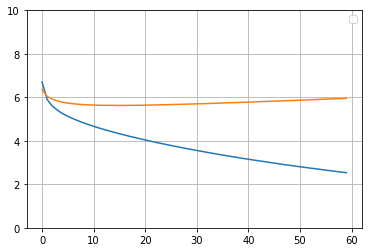

In [62]:
plot_loss(log_path_tw21_over_all,ylim=[0,10], MAX=60)

In [40]:
CUDA_VISIBLE_DEVICES=0
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0306_tw21_overall_16.mdl \
                    --data_dir ../../data/em_dial/splitted/over_sample/cleaning\
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion \
                    --num_inf 5

Loading the test dataset...
Read 450 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: ロボットがそんなに言うなら、わかったよ。
tgt: じゃぁ、君が好きな音楽かけながら始めようか。
tgt_emotion: contentment

 inf:  NONE
1[-2.05]: じゃぁジョギングしようよ! 
2[-2.25]: ではジョギングをしましょう。 
3[-2.26]: ではジョギングしましょう。 
4[-2.49]: ではジョギングしようよ! 
5[-2.50]: ではジョギングしてください。 

 inf:  neutral
1[-2.21]: じゃぁジョギングしようよ! 
2[-2.38]: ではジョギングしましょう。 
3[-2.55]: じゃぁジョギングしよう! 
4[-2.67]: ではジョギングしてください。 
5[-2.71]: ではジョギングしようよ! 

 inf:  anger
1[-1.94]: じゃぁジョギングしようよ! 
2[-2.29]: ではジョギングしようよ! 
3[-2.32]: ではジョギングをしましょう。 
4[-2.36]: ではジョギングしましょう。 
5[-2.52]: じゃぁジョギングをしましょう。 

 inf:  sad
1[-2.07]: じゃぁジョギングしようよ! 
2[-2.23]: ではジョギングしましょう。 
3[-2.24]: ではジョギングをしましょう。 
4[-2.47]: ではジョギングしてください。 
5[-2.50]: ではジョギングしようよ! 

 inf:  happy
1[-2.03]: じゃぁジョギングしようよ! 
2[-2.22]: ではジョギングをしましょう。 
3[-2.24]: ではジョギングしましょう。 
4[-2.42]: ではジョギングしようよ! 
5[-2.47]: ではジョギングしてください。 

 inf:  contentment
1[-2.12]: じゃぁジョギングしようよ! 
2[-2.21]: ではジョギングをしましょう。 
3[-2.21]: ではジョギングしましょう。 
4[-2.37]: じゃぁジョギングをしましょう。 



 inf:  neutral
1[-3.23]: Aさんの健康のためではありませんよ。 
2[-3.24]: Aさんの健康のためではありませんよ! 
3[-3.40]: Aさんのためにゲームしようよ! 
4[-3.83]: Aさんの健康のためではありません。 
5[-4.01]: そうだよ! 

 inf:  anger
1[-3.93]: そうだよ! 
2[-4.07]: Aさんのため! 
3[-4.20]: Aさんのため!! 
4[-4.20]: Aさんのため!? 
5[-4.38]: Aさんのため!!! 

 inf:  sad
1[-2.51]: そうだよ!!!Aさんがゲームしようよ? 
2[-2.57]: そうだよ!!!Aさんがゲームしようよ?!? 
3[-2.77]: そうだよ!!!Aさんがゲームしようよ。 
4[-2.88]: そうだよ!!!Aさんがゲームしようよ?! 
5[-3.90]: Aさんの健康のためではありません。 

 inf:  happy
1[-3.91]: そうだよ! 
2[-4.26]: Aさんのため! 
3[-4.35]: Aさんのため!? 
4[-4.45]: Aさんのため!! 
5[-4.50]: そうだよ!Aさんのため! 

 inf:  contentment
1[-2.62]: そうだよ!Aさんのためにゲームしようよ? 
2[-2.86]: そうだよ!Aさんのためにゲームしようよ。 
3[-3.88]: そうだよ! 
4[-4.05]: そうだよ!Aさんのためにゲームしようよ 
5[-4.23]: そうだよ!Aさんのため! 


# ☆ twitter  -> over-sampling all 
#                   -> over-sampling cleaning

In [48]:
log_path_tw21_overall16_overclean = "../../emotion_dialogue_model/log/train20190307213702.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/over_sample/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0307_tw21_overall16_overclean

Use emotion: True

Checkpoint path: ./model/0306_tw21_overall_16.mdl

Pretrained: True

Fix embedding: False

PAD_id: 0

tfd_lambda: 0.4

EOS_id: 2

UNK_id: 3

dropout: 0.1

hidden_size: 256

MAX_UTTR_LEN: 50

decoder_learning_ratio: 1.0

batch_size: 64

max_epoch: 400

l2_pooling: False

learning_rate: 3e-05

lr_decay: 0.5773502691896258

max_gradient: 50.0

SOS_id: 1

teacher_forcing_ratio: 1.0

chance rate of loss :  -10.373491181781864
initial validation loss :  4.9438
Minimize validation loss(4.9072) : 3 Epoch 
Minimize training loss(0.3428) : 336 Epoch 


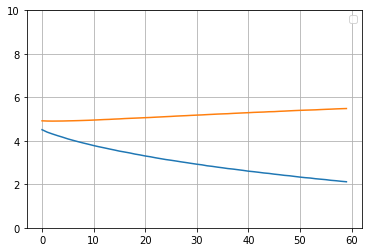

In [49]:
plot_loss(log_path_tw21_overall_overclean,ylim=[0,10], MAX=60)

In [42]:
CUDA_VISIBLE_DEVICES=0
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0307_tw21_overall16_overclean_3.mdl \
                    --data_dir ../../data/em_dial/splitted/over_sample/cleaning\
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion \
                    --num_inf 5

Loading the test dataset...
Read 450 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: これからもいろいろ教えてくれる?
tgt: もちろんだよ。Aさんのためになるなら怒りだってする。もちろんいい事は思いっきり褒めるから。
tgt_emotion: happy

 inf:  NONE
1[-2.70]: もちろん! 
2[-2.82]: Aさんのために掃除しようよ! 
3[-3.23]: Aさんのために掃除しようよ。 
4[-3.51]: もちろん? 
5[-3.52]: Aさんが掃除しようよ! 

 inf:  neutral
1[-2.76]: もちろん! 
2[-2.97]: Aさんのために掃除しようよ! 
3[-3.13]: Aさんのために掃除してください。 
4[-3.20]: Aさんのために掃除しようよ。 
5[-3.26]: Aさんのために掃除しましょう。 

 inf:  anger
1[-2.43]: もちろん! 
2[-2.72]: Aさんのために掃除しようよ! 
3[-3.26]: Aさんのために掃除してください。 
4[-3.50]: Aさんのために掃除しましょう。 
5[-3.57]: もちろん? 

 inf:  sad
1[-2.71]: もちろん! 
2[-2.83]: Aさんのために掃除しようよ! 
3[-3.18]: Aさんのために掃除しようよ。 
4[-3.51]: もちろん? 
5[-3.53]: Aさんが掃除しようよ! 

 inf:  happy
1[-2.48]: もちろん! 
2[-2.76]: Aさんのために掃除しようよ! 
3[-3.15]: Aさんのために掃除してください。 
4[-3.37]: Aさんが掃除しようよ! 
5[-3.58]: もちろん? 

 inf:  contentment
1[-2.52]: もちろん! 
2[-2.94]: Aさんのために掃除しようよ! 
3[-3.23]: Aさんのために掃除しようよ。 
4[-3.51]: もちろん? 
5[-3.54]: Aさんが掃除しようよ! 
Dial 2:
src: そっか。いつもごめんね。これからはちゃんと言う事を聞くよう


 inf:  sad
1[-1.86]: 本当ですか? 
2[-2.70]: ありがとうございます! 
3[-2.80]: Aさんのために掃除をしてくれませんか? 
4[-2.96]: 本当ですか?! 
5[-3.12]: ありがとう! 

 inf:  happy
1[-1.89]: 本当ですか? 
2[-2.65]: ありがとうございます! 
3[-2.83]: 本当ですか?! 
4[-3.11]: ありがとう! 
5[-3.16]: 本当ですか! 

 inf:  contentment
1[-1.83]: 本当ですか? 
2[-2.65]: ありがとうございます! 
3[-2.97]: 本当ですか?! 
4[-3.12]: ありがとう! 
5[-3.25]: 本当ですか! 


In [50]:
CUDA_VISIBLE_DEVICES=0
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0307_tw21_overall16_overclean_30.mdl \
                    --data_dir ../../data/em_dial/splitted/over_sample/cleaning\
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion \
                    --num_inf 5

Loading the test dataset...
Read 450 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: いやだ。
tgt: 掃除していただけますか。
tgt_emotion: neutral

 inf:  NONE
1[-2.22]: Aさんのために掃除しようよ! 
2[-2.50]: Aさんのために掃除しようよ。 
3[-2.72]: じゃあ掃除しようよ! 
4[-2.84]: Aさんが掃除しようよ。 
5[-2.90]: 掃除しようよ! 

 inf:  neutral
1[-2.42]: Aさんのために掃除しようよ! 
2[-2.45]: Aさんのために掃除しようよ。 
3[-2.82]: Aさんが掃除しようよ。 
4[-2.89]: じゃあ掃除しようよ! 
5[-2.97]: 掃除しようよ! 

 inf:  anger
1[-2.10]: Aさんのために掃除しようよ! 
2[-2.59]: じゃあ掃除しようよ! 
3[-2.69]: Aさんが掃除しようよ! 
4[-2.85]: Aさんのため! 
5[-2.89]: 掃除しようよ! 

 inf:  sad
1[-2.23]: Aさんのために掃除しようよ! 
2[-2.48]: Aさんのために掃除しようよ。 
3[-2.70]: じゃあ掃除しようよ! 
4[-2.83]: Aさんが掃除しようよ。 
5[-2.94]: 掃除しようよ! 

 inf:  happy
1[-2.12]: Aさんのために掃除しようよ! 
2[-2.59]: じゃあ掃除しようよ! 
3[-2.67]: Aさんのために掃除しようよ。 
4[-2.83]: Aさんが掃除しようよ! 
5[-2.88]: 掃除しようよ! 

 inf:  contentment
1[-2.31]: Aさんのために掃除しようよ! 
2[-2.51]: Aさんのために掃除しようよ。 
3[-2.74]: じゃあ掃除しようよ! 
4[-2.84]: Aさんが掃除しようよ。 
5[-2.93]: 掃除しようよ! 
Dial 2:
src: まずはなんだっけ?
tgt: 換気をしましょう。窓を開けて空気の入れ換えです。
tgt_emotion: neutral


 inf:  contentment
1[-2.32]: 本当ですか? 
2[-3.15]: ありがとうございます! 
3[-3.20]: 嬉しい! 
4[-3.35]: もちろん! 
5[-3.43]: やったー! 
Dial 10:
src: 何で?
tgt: 汚いからだよ。
tgt_emotion: NONE

 inf:  NONE
1[-2.88]: そんなこと言わずに掃除をしておけばいいんだよ! 
2[-3.03]: そんなこと言わずに掃除をしておけばいいんだよ? 
3[-3.07]: そんなこと言わずに掃除しようよ! 
4[-3.19]: そんなこと言わずに掃除をしておけばいいんだよ。 
5[-3.26]: ほら掃除しようよ! 

 inf:  neutral
1[-3.07]: そんなこと言わずに掃除をしておけばいいんだよ? 
2[-3.15]: そんなこと言わずに掃除をしておけばいいんだよ! 
3[-3.16]: そんなこと言わずに掃除をしておけばいいんだよ。 
4[-3.28]: そんなこと言わずに掃除しようよ! 
5[-3.31]: ほら掃除しようよ! 

 inf:  anger
1[-2.60]: そんなこと言わずに掃除をしておけばいいんだよ! 
2[-2.88]: そんなこと言わずに掃除しようよ! 
3[-3.14]: 君ならできるよ! 
4[-3.27]: ほら掃除しようよ! 
5[-3.37]: だって掃除しようよ! 

 inf:  sad
1[-2.54]: 掃除をしておけばすっきりしますよ。 
2[-2.75]: 掃除をしておけばすっきりしますよ! 
3[-3.22]: どうして掃除をしておけばいいんだよ? 
4[-3.27]: ほら掃除しようよ! 
5[-3.30]: ほら掃除をしておけばいいんだよ! 

 inf:  happy
1[-2.72]: そんなこと言わずに掃除をしておけばいいんだよ! 
2[-2.93]: そんなこと言わずに掃除しようよ! 
3[-3.16]: そんなこと言わずに掃除しよう! 
4[-3.22]: ほら掃除しようよ! 
5[-3.29]: 君ならできるよ! 

 inf:  contentment
1[-2.48]: ほら掃除をしておけばすっきりしますよ! 
2[-2.50]: 掃除をしておけば

# ☆ twitter  -> over-sampling all with kao

In [21]:
log_path_tw21_over_allkao = "../../emotion_dialogue_model/log/train20190307204552.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/kao/over_sample/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0306_tw21_overallkao

Use emotion: True

Checkpoint path: ./model/0212_twitter_21.mdl

Pretrained: True

Fix embedding: False

EOS_id: 2

decoder_learning_ratio: 1.0

SOS_id: 1

batch_size: 64

decay_step: 12500

inf_last: False

UNK_id: 3

l2_pooling: False

max_epoch: 400

MAX_UTTR_LEN: 50

learning_rate: 3e-05

teacher_forcing_ratio: 1.0

num_layers: 2

max_gradient: 50.0

dropout: 0.1

hidden_size: 256

chance rate of loss :  -10.373491181781864
initial validation loss :  7.9672
Minimize validation loss(4.284) : 19 Epoch 
Minimize training loss(1.9639) : 64 Epoch 


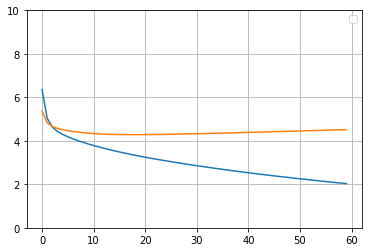

In [36]:
plot_loss(log_path_tw21_over_allkao,ylim=[0,10], MAX=60)

In [26]:
CUDA_VISIBLE_DEVICES=0
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0306_tw21_overallkao_19.mdl \
                    --data_dir ../../data/em_dial/splitted/kao/over_sample/cleaning\
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion \
                    --num_inf 5

Loading the test dataset...
Read 450 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: それは、こわいね。
tgt: だから、いつも言っているけれど、部屋はきれいにしておかないとダメなの。(・_・)
tgt_emotion: neutral

 inf:  NONE
1[-0.96]: わかっていただけましたか?(悲) 
2[-1.19]: わかっていただけますよ?(悲) 
3[-1.19]: わかっていただけましたか!(怒) 
4[-1.20]: わかっていただけましたか!(喜) 
5[-1.24]: わかっていただけましたか?(・_・) 

 inf:  neutral
1[-0.79]: わかっていただけましたか?(・_・) 
2[-1.08]: わかっていただけますよ?(・_・) 
3[-1.08]: わかっていただけましたか!(・_・) 
4[-1.11]: わかっていただけましたか。(・_・) 
5[-1.20]: わかっていただけますよ!(・_・) 

 inf:  anger
1[-0.57]: わかっていただけましたか?!(怒) 
2[-0.82]: わかっていただけましたか!(怒) 
3[-0.85]: そんなこと言わずに掃除しようよ!(怒) 
4[-0.86]: わかっていただけましたか?(怒) 
5[-1.18]: わかっていただけましたか。(怒) 

 inf:  sad
1[-0.80]: わかっていただけましたか?(悲) 
2[-1.07]: わかっていただけますよ?(悲) 
3[-1.11]: わかっていただけましたか!(喜) 
4[-1.11]: わかっていただけましたか。(悲) 
5[-1.21]: わかっていただけますよ!(喜) 

 inf:  happy
1[-0.67]: わかっていただけましたか?!(喜) 
2[-0.76]: わかっていただけましたか?(喜) 
3[-0.85]: そんなこと言わずに掃除しようよ!(喜) 
4[-0.88]: わかっていただけましたか!(喜) 
5[-0.91]: わかっていただけますよ!(喜) 

 inf:  contentment
1[-0.86]: わかってい

# ☆ twitter  -> over-sampling all with kao
#   -> over-sampling clean with kao

In [45]:
log_path_tw21_overallkao_overcleankao = "../../emotion_dialogue_model/log/train20190307222037.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/kao/over_sample/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0306_tw21_overallkao19_overcleankao

Use emotion: True

Checkpoint path: ./model/0306_tw21_overallkao_19.mdl

Pretrained: True

Fix embedding: False

max_gradient: 50.0

dropout: 0.1

EOS_id: 2

teacher_forcing_ratio: 1.0

lr_decay: 0.5773502691896258

PAD_id: 0

SOS_id: 1

decay_step: 5500

l2_pooling: False

UNK_id: 3

batch_size: 64

hidden_size: 256

inf_last: False

learning_rate: 3e-05

MAX_UTTR_LEN: 50

tfd_lambda: 0.4

chance rate of loss :  -10.373491181781864
initial validation loss :  3.7054
Minimize validation loss(3.6767) : 3 Epoch 
Minimize training loss(0.7096) : 143 Epoch 


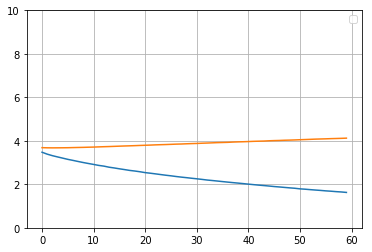

In [51]:
plot_loss(log_path_tw21_overallkao_overcleankao,ylim=[0,10], MAX=60)

In [54]:
CUDA_VISIBLE_DEVICES=0
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0306_tw21_overallkao19_overcleankao_3.mdl \
                    --data_dir ../../data/em_dial/splitted/kao/over_sample/cleaning\
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion \
                    --num_inf 5

Loading the test dataset...
Read 450 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: それはすごいじゃん。
tgt: 掃除を学習しますから行動を見せてください。
tgt_emotion: NONE

 inf:  NONE
1[-1.09]: Aさんが掃除しようよ!(喜) 
2[-1.12]: じゃあ掃除しようよ!(喜) 
3[-1.15]: Aさんが掃除しようよ。(悲) 
4[-1.23]: じゃあ掃除しようよ!(怒) 
5[-1.27]: 掃除しようよ!(喜) 

 inf:  neutral
1[-0.96]: Aさんが掃除しようよ。(・_・) 
2[-1.02]: Aさんが掃除しようよ!(・_・) 
3[-1.04]: じゃあ掃除しようよ!(・_・) 
4[-1.18]: じゃあ掃除しようよ。(・_・) 
5[-1.35]: じゃあ掃除しようよ?(・_・) 

 inf:  anger
1[-0.85]: じゃあ掃除しようよ!(怒) 
2[-0.88]: Aさんが掃除しようよ!(怒) 
3[-1.00]: だって掃除しようよ!(怒) 
4[-1.02]: Aさんが掃除しようよ。(怒) 
5[-1.04]: では掃除しようよ!(怒) 

 inf:  sad
1[-0.77]: Aさんのために掃除しようよ!(喜) 
2[-0.93]: Aさんが掃除しようよ。(悲) 
3[-0.99]: Aさんが掃除しようよ!(喜) 
4[-1.01]: じゃあ掃除しようよ!(喜) 
5[-1.24]: じゃあ掃除しようよ。(悲) 

 inf:  happy
1[-0.86]: じゃあ掃除しようよ!(喜) 
2[-0.89]: Aさんが掃除しようよ!(喜) 
3[-0.97]: Aさんが掃除しようよ。(喜) 
4[-1.03]: だって掃除しようよ!(喜) 
5[-1.05]: 掃除しようよ!(喜) 

 inf:  contentment
1[-0.94]: Aさんが掃除しようよ。(安心) 
2[-1.07]: じゃあ掃除しようよ!(安心) 
3[-1.12]: Aさんが掃除しようよ!(喜) 
4[-1.14]: じゃあ掃除しようよ。(安心) 
5[-

# ☆ twitter  -> over-sampling all with kao